In [3]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# import xmltodict
import xml.etree.ElementTree as ET
# XML을 json처럼 parsing
from tqdm.auto import tqdm
# 오래걸리는 반복문 시각화

In [4]:
Dir = '/content/drive/MyDrive/Colab Notebooks/mask_dataset'
print(os.listdir(Dir))
images_path = os.path.join(Dir,'images')
print("Image path = {}".format(images_path))
print("Total number of images : {}".format(len(os.listdir(images_path))))
Annotation_path = os.path.join(Dir,'annotations')
print("Annotation path = {}".format(Annotation_path))
print("Total Annotation files are {}".format(len(os.listdir(Annotation_path))))

['images', 'annotations']
Image path = /content/drive/MyDrive/Colab Notebooks/mask_dataset/images
Total number of images : 853
Annotation path = /content/drive/MyDrive/Colab Notebooks/mask_dataset/annotations
Total Annotation files are 853


In [8]:
Image_width = 80
Image_height = 80
Image_array = []
Labels = []

#Check label files are according to images files
Sorted_files = sorted(os.listdir(Annotation_path))
print(Sorted_files[200:210])
Sorted_images_path = sorted(os.listdir(images_path))
print(Sorted_images_path[200:210])

['maksssksksss279.xml', 'maksssksksss28.xml', 'maksssksksss280.xml', 'maksssksksss281.xml', 'maksssksksss282.xml', 'maksssksksss283.xml', 'maksssksksss284.xml', 'maksssksksss285.xml', 'maksssksksss286.xml', 'maksssksksss287.xml']
['maksssksksss279.png', 'maksssksksss28.png', 'maksssksksss280.png', 'maksssksksss281.png', 'maksssksksss282.png', 'maksssksksss283.png', 'maksssksksss284.png', 'maksssksksss285.png', 'maksssksksss286.png', 'maksssksksss287.png']


In [9]:
# Prepare data and respective labels
def get_box(obj):
    
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

In [12]:
for file in tqdm(sorted(os.listdir(Annotation_path)),desc='Preparing data..'):
    file_path = Annotation_path + "/" + file
    xml = ET.parse(file_path)
    root = xml.getroot()
    image_path = images_path + "/" + root[1].text

     
    for bndbox in root.iter('bndbox'):
        [xmin, ymin, xmax, ymax] = get_box(bndbox)
        img = cv2.imread(image_path)
        face_img = img[ymin:ymax,xmin:xmax]
        face_img  = cv2.resize(face_img,(Image_width,Image_height))
        Image_array.append(np.array(face_img)) 
    
    for obj in root.findall('object'):
        name = obj.find('name').text 
        Labels.append(np.array(name)) 

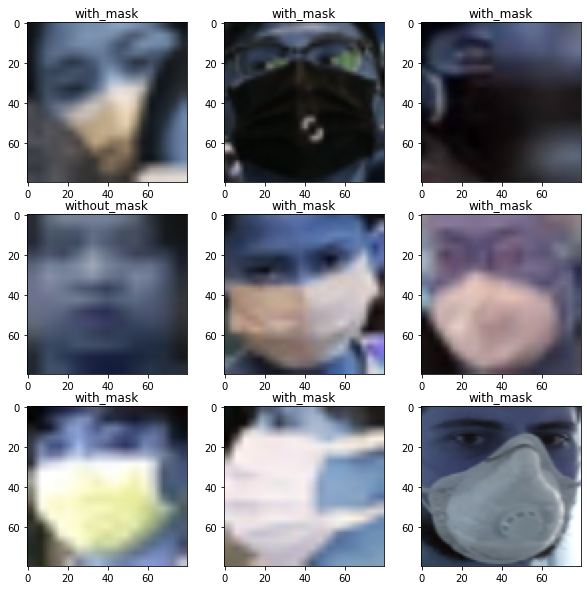

In [16]:
#Check random images 
import random as rn

fig,ax = plt.subplots(3,3)
fig.set_size_inches(10,10)

for i in range(3):
    for j in range(3):
        l = rn.randint(0,len(Labels))
        ax[i,j].imshow(Image_array[l])
        ax[i,j].set_title(Labels[l])

In [17]:
Image_array[5]

array([[[ 65,  71,  81],
        [ 65,  71,  81],
        [ 65,  71,  81],
        ...,
        [ 60,  61,  61],
        [ 60,  61,  61],
        [ 60,  61,  61]],

       [[ 65,  71,  81],
        [ 65,  71,  81],
        [ 65,  71,  81],
        ...,
        [ 60,  61,  61],
        [ 60,  61,  61],
        [ 60,  61,  61]],

       [[ 68,  73,  85],
        [ 68,  73,  85],
        [ 68,  73,  85],
        ...,
        [ 60,  61,  61],
        [ 60,  61,  61],
        [ 60,  61,  61]],

       ...,

       [[ 55,  59,  68],
        [ 55,  59,  68],
        [ 55,  59,  68],
        ...,
        [228, 234, 222],
        [228, 234, 222],
        [228, 234, 222]],

       [[ 55,  60,  69],
        [ 55,  60,  69],
        [ 55,  60,  69],
        ...,
        [228, 234, 222],
        [228, 234, 222],
        [228, 234, 222]],

       [[ 55,  60,  69],
        [ 55,  60,  69],
        [ 55,  60,  69],
        ...,
        [228, 234, 222],
        [228, 234, 222],
        [228, 234, 222]]